# Leitura dos Dados

## Acesso ao Google Drive

Esse caderno precisou ser rodado no Google Colab por conta da incompatibilidade da minha máquina com tensorflow.text.

Por esse motivo ele está separado dos modelos presentes em `intent.ipynb`. Também por isso estamos fazendo a leitura dos dados a partir do Google Drive.

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Carregamento dos dados

In [2]:
import numpy as np
import pandas as pd

In [3]:
qa_data = pd.read_csv("/content/drive/MyDrive/PLN/q&a_intent_train.csv", names= ["target", "text"])

qa_data

,target,text
0,other,What is the principle behind flight?
1,other,What are the four forces acting on an airplane?
2,other,What is the difference between IFR and VFR?
3,other,What is a black box in aviation?
4,other,What is the busiest airport in the world by pa...
...,...,...
94,other,"What is ""ACARS""?"
95,other,"What is ""Alternate Airport""?"
96,other,"at does ""pan-pan"" mean?"
97,other,"What is ""decision height"" (DH)?"


In [4]:
atis_train_data = pd.read_csv("/content/drive/MyDrive/PLN/atis_intents_train.csv", names= ["target", "text"])
atis_test_data = pd.read_csv("/content/drive/MyDrive/PLN/atis_intents_test.csv", names= ["target", "text"])

print("ATIS train dataset size is:", len(atis_train_data))
print("ATIS test dataset size is:", len(atis_test_data))

ATIS train dataset size is: 4834
ATIS test dataset size is: 800


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
qa_train_data, qa_test_data = train_test_split(qa_data, test_size=0.20, random_state=42)

print("Q&A train dataset size is:", len(qa_train_data))
print("Q&A test dataset size is:", len(qa_test_data))

Q&A train dataset size is: 79
Q&A test dataset size is: 20


In [6]:
train_data = pd.concat([qa_train_data, atis_train_data], ignore_index=True)

train_data

,target,text
0,other,"What is a ""taxiway""?"
1,other,"What is a ""slot-restricted"" airport?"
2,other,"What is ""NextGen"" in U.S. aviation?"
3,other,"What does the term ""gate hold"" mean in aviation?"
4,other,"What does ""direct flight"" mean as opposed to ""..."
...,...,...
4908,atis_airfare,what is the airfare for flights from denver t...
4909,atis_flight,do you have any flights from denver to baltim...
4910,atis_airline,which airlines fly into and out of denver
4911,atis_flight,does continental fly from boston to san franc...


In [7]:
test_data = pd.concat([qa_test_data, atis_test_data], ignore_index=True)

test_data

,target,text
0,other,"What is ""yaw"" in aviation?"
1,other,"What is a ""deadhead"" flight?"
2,other,"What is ""Alternate Airport""?"
3,other,What is the purpose of ailerons on an aircraft?
4,other,"What is ""decision height"" (DH)?"
...,...,...
815,atis_flight,please find all the flights from cincinnati t...
816,atis_flight,find me a flight from cincinnati to any airpo...
817,atis_flight,i'd like to fly from miami to chicago on amer...
818,atis_flight,i would like to book a round trip flight from...


## Correção da distribuição de classes entre datasets

In [8]:
def check_stratification(train_data, test_data, target_column):
    """
    Function to check the stratification of training and testing datasets based on the target column.

    Parameters:
    - train_data: DataFrame containing the training data.
    - test_data: DataFrame containing the testing data.
    - target_column: String name of the target column.

    Returns:
    - None: This function prints the distribution of the target column in both datasets.
    """
    # Calculate the distribution in the training data
    train_distribution = train_data[target_column].value_counts(normalize=True) * 100

    # Calculate the distribution in the testing data
    test_distribution = test_data[target_column].value_counts(normalize=True) * 100

    # Print the distributions
    print("Training Data Distribution:\n", train_distribution)
    print("\nTesting Data Distribution:\n", test_distribution)

check_stratification(train_data, test_data, 'target')

Training Data Distribution:
 atis_flight            74.618359
atis_airfare            8.609811
atis_ground_service     5.190311
atis_airline            3.195604
atis_abbreviation       2.992062
atis_aircraft           1.648687
other                   1.607979
atis_flight_time        1.099125
atis_quantity           1.038062
Name: target, dtype: float64

Testing Data Distribution:
 atis_flight            77.073171
atis_airfare            5.853659
atis_airline            4.634146
atis_ground_service     4.390244
atis_abbreviation       4.024390
other                   2.439024
atis_aircraft           1.097561
atis_quantity           0.365854
atis_flight_time        0.121951
Name: target, dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

data = pd.concat([test_data, train_data], ignore_index=True)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Splitting the data into train and test sets while stratifying on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.reset_index()

test_data = pd.concat([X_test, y_test], axis=1)
test_data = test_data.reset_index()

check_stratification(train_data, test_data, 'target')

Training Data Distribution:
 atis_flight            74.967292
atis_airfare            8.220672
atis_ground_service     5.080680
atis_airline            3.401657
atis_abbreviation       3.139991
other                   1.722634
atis_aircraft           1.569996
atis_flight_time        0.959442
atis_quantity           0.937636
Name: target, dtype: float64

Testing Data Distribution:
 atis_flight            74.978204
atis_airfare            8.195292
atis_ground_service     5.056670
atis_airline            3.400174
atis_abbreviation       3.138622
other                   1.743679
atis_aircraft           1.569311
atis_quantity           0.959024
atis_flight_time        0.959024
Name: target, dtype: float64


# Transformers

Para treinar o modelo Transformers, iremos utilizar BERT.

## Dependências

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -U "tensorflow-text==2.13.*"

In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install "tf-models-official==2.13.*"

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

## Transformar os dados em tensorflow dataset

Precisamos transformar os nossos dados para um formato válido para ser utilizado pelo nosso modelo. Iremos utilizar TensorFlow Dataset para treino e teste.

In [14]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()

# One hot encoding the labels
encoded_train_labels = binarizer.fit_transform(train_data['target'])
encoded_test_labels = binarizer.fit_transform(test_data['target'])

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train_data['text'], encoded_train_labels, test_size=0.2, random_state=42)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((test_data['text'], encoded_test_labels))

In [16]:
# Batch, cache, and prefetch the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32

train_ds = train_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.batch(batch_size).cache().prefetch(buffer_size=AUTOTUNE)

## Baixar Bert

Iremos utilizar o modelo small BERT para treinar os nossos dados. Estamos utilizando-o por questão de tamanho de modelo e tempo de treinamento.

In [20]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


## Treinamento do Modelo

In [21]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

Aqui, construímos um classificador baseado no BERT para tarefas de classificação de texto, seguindo estes passos:

- **Input de Texto**: A entrada do modelo é o texto bruto, preparado para processamento pelo BERT.

- **Pré-processamento**: Antes de serem processados pelo BERT, os textos passam por uma camada de pré-processamento. Esta etapa é crucial para transformar o texto bruto em um formato adequado para o BERT, incluindo a tokenização e a aplicação de máscaras de atenção.

- **Encoder BERT**: Utilizamos um encoder BERT do TensorFlow Hub no nosso modelo. Esta camada é treinável, permitindo ajustes finos para adaptar o modelo às especificidades dos nossos dados.

- **Dropout**: Para evitar overffiting.

- **Camada Densa de Saída**: Finalmente, a saída do BERT é passada para uma camada densa que produz os logits para cada uma das classes de interesse.

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(9, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

In [23]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [24]:
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [25]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics,
                         run_eagerly=True)

In [26]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               epochs=epochs,
                               validation_data=val_ds)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/5
115/115 [==============================] - 1081s 9s/step - loss: 0.8646 - categorical_accuracy: 0.7467 - val_loss: 0.1379 - val_categorical_accuracy: 0.9706
Epoch 2/5
115/115 [==============================] - 1017s 9s/step - loss: 0.1024 - categorical_accuracy: 0.9741 - val_loss: 0.0334 - val_categorical_accuracy: 0.9891
Epoch 3/5
115/115 [==============================] - 1020s 9s/step - loss: 0.0398 - categorical_accuracy: 0.9894 - val_loss: 0.0216 - val_categorical_accuracy: 0.9935
Epoch 4/5
115/115 [==============================] - 1017s 9s/step - loss: 0.0171 - categorical_accuracy: 0.9962 - val_loss: 0.0178 - val_categorical_accuracy: 0.9946
Epoch 5/5
115/115 [==============================] - 998s 9s/step - loss: 0.0133 - categorical_accuracy: 0.9967 - val_loss: 0.0203 - val_categorical_accuracy: 0.9946


## Avaliação do Modelo

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


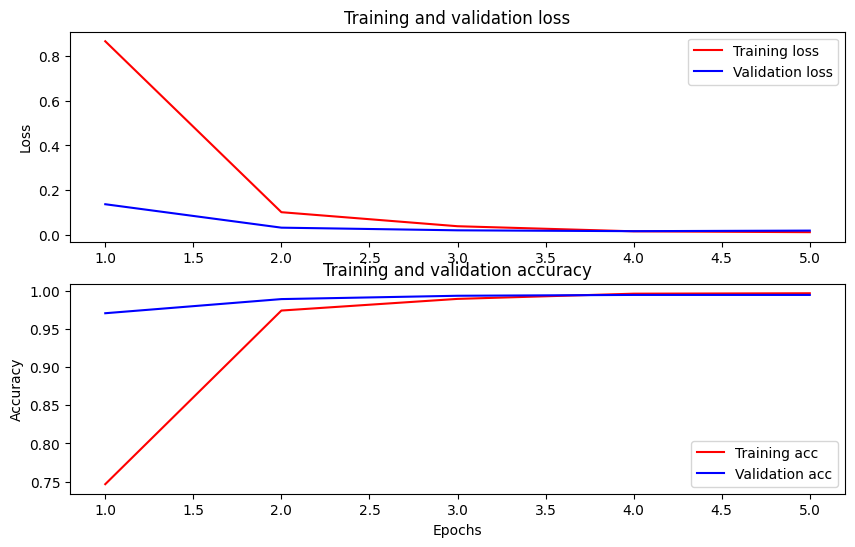

In [27]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['categorical_accuracy']
val_acc = history_dict['val_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [30]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

36/36 [==============================] - 76s 2s/step - loss: 0.0517 - categorical_accuracy: 0.9878
Loss: 0.05167120322585106
Accuracy: 0.9877942204475403


In [37]:
y_pred = classifier_model.predict(test_ds)

36/36 [==============================] - 77s 2s/step


In [38]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

In [39]:
# Step 2: Prepare true labels
# You need to adjust this part to correctly extract labels from your `test_ds`
# This is a generic approach and might need adjustments.
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_true_classes = np.argmax(y_true, axis=1)  # Assuming one-hot encoded true labels

In [40]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=train_data['target'].unique())  # Adjust target_names as per your dataset
print(report)

                     precision    recall  f1-score   support

        atis_flight       0.94      0.94      0.94        36
      atis_aircraft       0.94      0.89      0.91        18
       atis_airfare       0.99      0.99      0.99        94
              other       0.91      1.00      0.95        39
       atis_airline       1.00      0.99      0.99       860
atis_ground_service       1.00      0.91      0.95        11
  atis_abbreviation       0.98      1.00      0.99        58
   atis_flight_time       0.91      0.91      0.91        11
      atis_quantity       1.00      1.00      1.00        20

           accuracy                           0.99      1147
          macro avg       0.96      0.96      0.96      1147
       weighted avg       0.99      0.99      0.99      1147



Percebemos um bom resultado com o treinamento do nosso modelo BERT. O modelo alcançou uma acurácia de 98.78% no conjunto de teste, indicando uma alta taxa de previsões corretas. A perda no conjunto de teste foi de 0.0517, sugerindo uma boa generalização do modelo. Tivemos bons valores de precision e recall, além de um valor médio de 0.96 para o f1-score. Ou seja, o modelo se saiu muito bem na avaliação do dataset de testes. Um ponto negativo que vale a pena salientar é o tempo de treinamento, o qual teve uma duração um pouco maior de uma hora.

# Avaliação Geral dos Modelos

Tivemos, no geral, bons resultados em todos os modelos que treinamos. Apresentando uma boa acurácia e f1-score. 

O modelo com o menor desempenho foi o CNN, se saindo pior do que o SVM para nosso conjunto de dados. No entanto, acreditamos que um ajuste na arquitetura poderia levar a melhores resultados.

Como esparado, o modelo utilizando BERT foi o que se saiu melhor, apresentando ótimos resultados na avaliação do dataset de testes.